#### Шаг 1: EDA и ресерч-анализ. Графики, применение инструментов EDA. Комментарий до графика. Вывод после графика/стат методов. Корреляция колонок с таргетом.





#### Смотрим что есть в файле, какие переменные, столбцы и тп

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

data = pd.read_csv('dataset.csv')
target = data[['popularity']]

data.head(5)



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

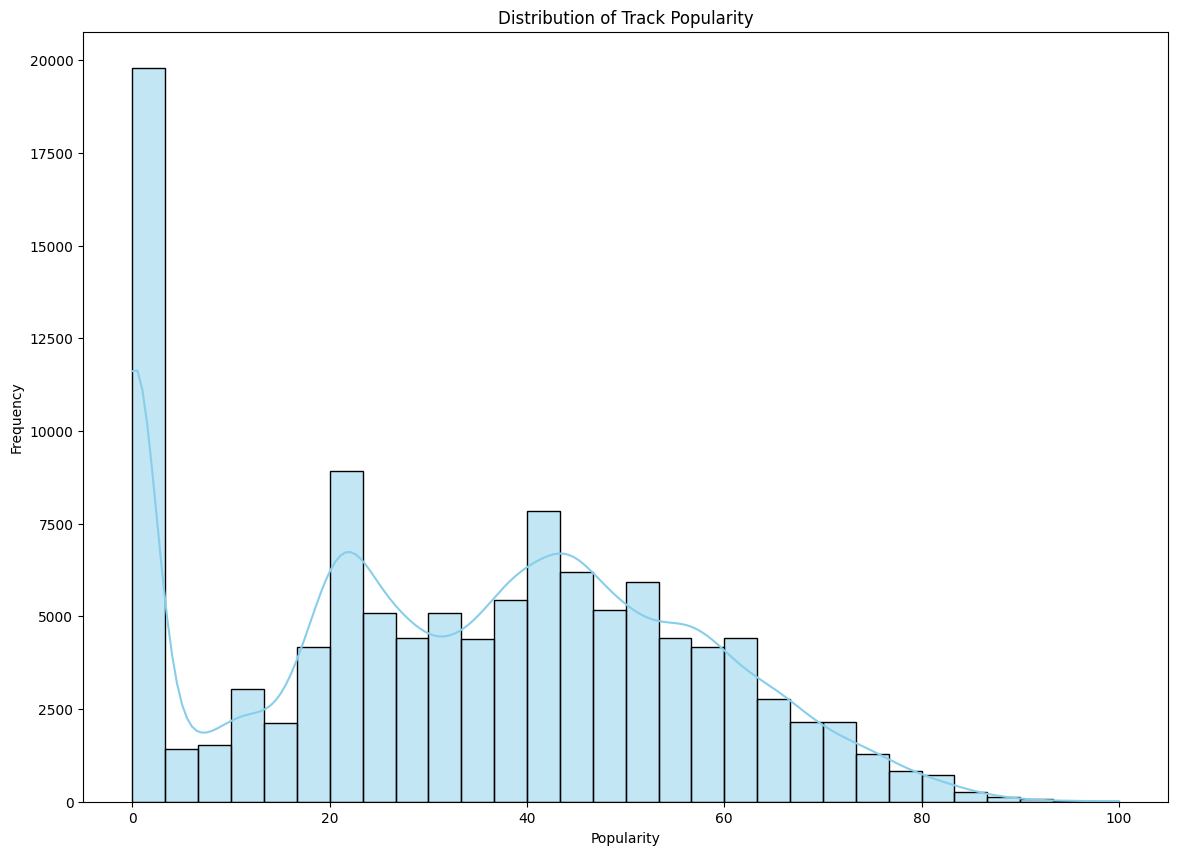

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))

# Plot distribution of the target variable 'popularity'
sns.histplot(data['popularity'], kde=True, bins=30, color="skyblue")
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

Гистограмма отображает распределение популярности песен относительно всего количества. Наблюдается скопление значений в диапазоне от 0 до 10. Это может указывать на то, что большая часть песен имеет  очень малую  популярность, а очень популярных  песен сравнительно меньше.

#### Вывод корреляции на исходных данных

In [51]:
data.select_dtypes(include=['number']).corr(method='pearson')

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
danceability,0.003444,0.035448,-0.073426,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011
acousticness,0.076840,-0.025472,-0.103788,-0.171533,-0.733906,-0.040937,-0.589803,0.095553,-0.002186,1.000000,0.104027,-0.020700,-0.107070,-0.208224,-0.176138


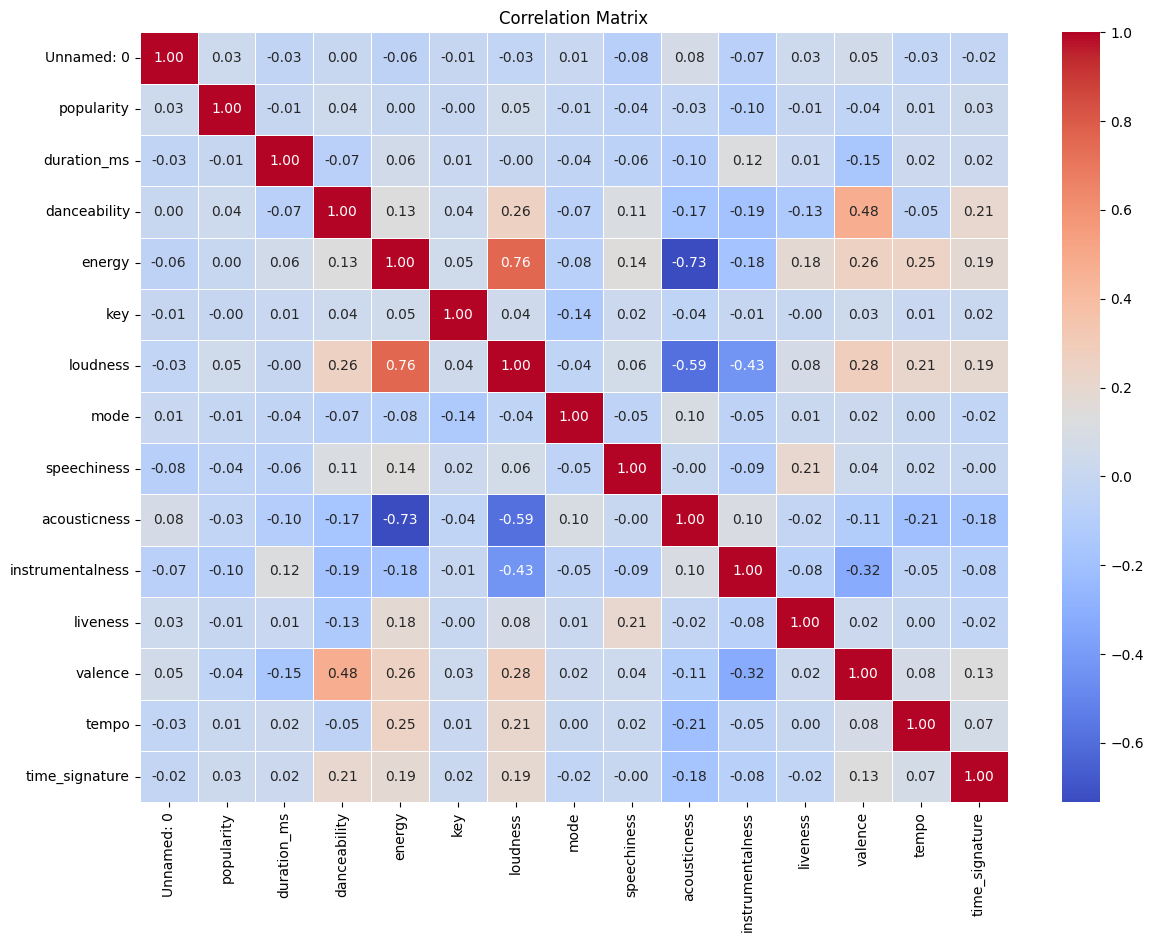

In [52]:
# Plot heatmap for correlations
correlation_matrix = data.select_dtypes(include=['number']).corr(method='pearson')
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Шаг 2: Feature Engineering. Корреляция новых колонок с таргетом. Feature Importances. Простая модель.

Проанализировав данные из первого шага, приступаем к корректировке исходных данных 


In [53]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# удаление заведомо ненужных данных
data = data.drop(columns=['track_id', 'album_name', 'track_name', 'Unnamed: 0'])




# замена bool на number
data['explicit'] = data['explicit'].replace({True: 1, False: 0})

# переводим жанры в number
label_encoder = LabelEncoder()
data['track_genre'] = label_encoder.fit_transform(data['track_genre'])


artist_dict = {}
artist_counter = 1

# Функция для получения суммы ID артистов с проверкой на NaN
def get_artist_id_sum(artists):
    global artist_counter
    if not isinstance(artists, str) or not artists:  
        return 0  
    artist_list = artists.split(';')  
    artist_ids = []
    for artist in artist_list:
        artist = artist.strip()  
        if artist and artist not in artist_dict:  
            artist_dict[artist] = artist_counter
            artist_counter += 1
        if artist:  
            artist_ids.append(artist_dict[artist])
    return sum(artist_ids)

# Считаем количество артистов в строке (проверка на NaN)
data['artists_count'] = data['artists'].apply(lambda x: len(x.split(';')) if isinstance(x, str) else 0)

# Применяем функцию для подсчета суммы ID артистов
data['artists'] = data['artists'].apply(get_artist_id_sum)



C:\Users\Stefan\AppData\Local\Temp\ipykernel_11784\399175019.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['explicit'] = data['explicit'].replace({True: 1, False: 0})


Перевели bool в number, жанры в уникальные id, а  артистов в количество артистов и сумму id артистов

In [54]:
data.select_dtypes(include=['number']).corr(method='pearson')


,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,artists_count
artists,1.000000,-0.006644,-0.012819,-0.004190,0.006453,-0.067045,0.000515,-0.054510,-0.027160,0.007720,0.089399,-0.021330,0.019107,-0.015245,-0.033005,-0.044548,0.435283,0.684106
popularity,-0.006644,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073,0.032692,0.006842
duration_ms,-0.012819,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225,-0.032826,0.026909
explicit,-0.004190,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386,-0.054828,0.040579
danceability,0.006453,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218,0.003569,0.067318
energy,-0.067045,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126,-0.056175,-0.032668
key,0.000515,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065,-0.005508,0.008445
loudness,-0.054510,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992,-0.027233,-0.014628
mode,-0.027160,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092,0.005242,-0.048422
speechiness,0.007720,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011,-0.085145,0.037309


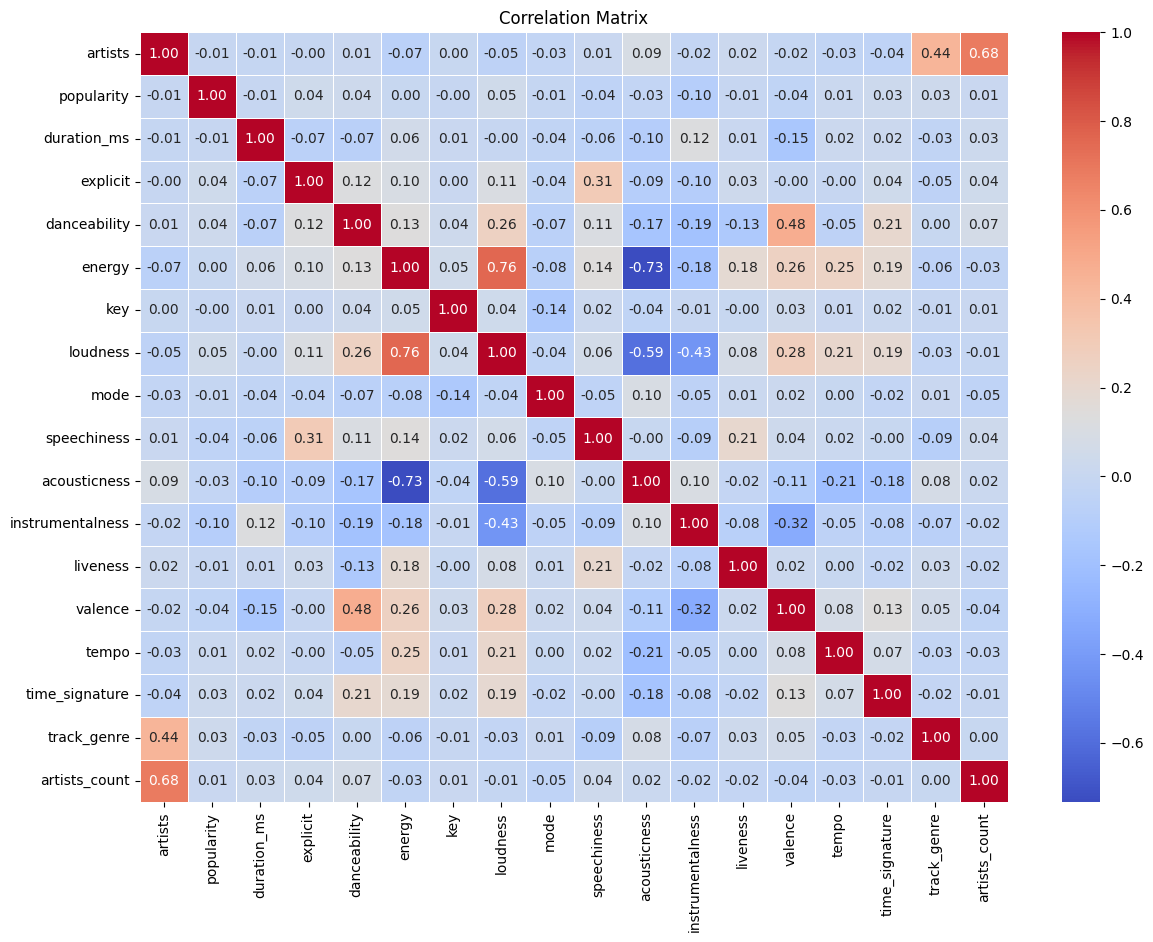

In [55]:
# Plot heatmap for correlations
correlation_matrix = data.select_dtypes(include=['number']).corr(method='pearson')
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

#### Шаг 3: Эксперименты с моделями машинного обучения/глубокого обучения. По одной из каждого семейства. Линейные, деревья, модификации градиентного бустинга , нейронные сети. На основе результатов выбрать лучшую - делаем кросс-валидацию(не менее 5 фолдов) и итоговый вывод. 

In [56]:
# Разделяем данные на признаки и целевую переменную
from sklearn.preprocessing import StandardScaler




X = data.drop(columns=['popularity'])
y = data['popularity']

# Разделяем на тренировочный и тестовый наборы (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Линейная регрессия
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Кросс-валидация
linear_cv_score = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_rmse = np.sqrt(-linear_cv_score.mean())
print(f"Линейная регрессия RMSE: {linear_rmse}")

# Дерево решений
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Кросс-валидация
tree_cv_score = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
tree_rmse = np.sqrt(-tree_cv_score.mean())
print(f"Дерево решений RMSE: {tree_rmse}")

# Градиентный бустинг
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Кросс-валидация
gb_cv_score = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_cv_score.mean())
print(f"Градиентный бустинг RMSE: {gb_rmse}")

# Нейронная сеть
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, y_train)

# Кросс-валидация
mlp_cv_score = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mlp_rmse = np.sqrt(-mlp_cv_score.mean())
print(f"Нейронная сеть RMSE: {mlp_rmse}")

# Сравнение моделей
results = {
    'Линейная регрессия': linear_rmse,
    'Дерево решений': tree_rmse,
    'Градиентный бустинг': gb_rmse,
    'Нейронная сеть': mlp_rmse
}




# Отображаем результаты
results_df = pd.DataFrame(results.items(), columns=['Модель', 'RMSE'])
print(results_df)

Линейная регрессия RMSE: 22.024693658070877
Дерево решений RMSE: 20.99722867784428
Градиентный бустинг RMSE: 19.981206063455993
Нейронная сеть RMSE: 20.5096203779768
                Модель       RMSE
0   Линейная регрессия  22.024694
1       Дерево решений  20.997229
2  Градиентный бустинг  19.981206
3       Нейронная сеть  20.509620
